# Researching a Pairs Trading Strategy

"Pairs trading is a relative-value arbitrage strategy that has been known in the quantitative finance community since the mid-1980s. It seeks to identify two securities whose prices tend to stay together. Upon divergence, the undervalued security is bought long and the overvalued one is sold short, which is typically referred to as a contrarian philosophy (buy when everyone else is selling and vice versa). When the prices revert back to their historical equilibrium, the trade is closed and a profit is realized."

https://bookdown.org/palomar/portfoliooptimizationbook/15-pairs-trading.html

In [14]:
import numpy as np
import pandas as pd

import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
np.random.seed(107)

import matplotlib.pyplot as plt

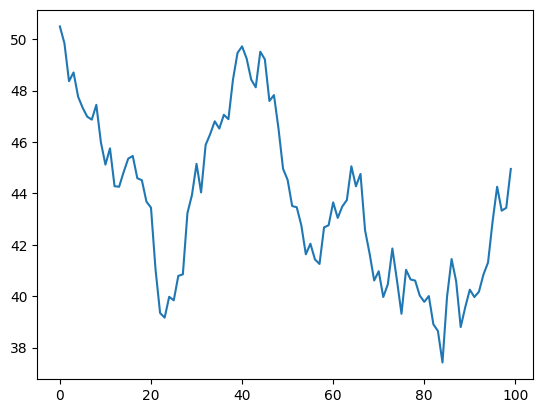

In [15]:
#We model X's daily returns by drawing from a normal distribution. Then, we perform a cumulative SUM to get the value of X on each day.

X_returns = np.random.normal(0, 1, 100) #Generate the daily returns

#SUM them and shift all the prices up into a reasonable range

X = pd.Series(np.cumsum(X_returns), name = 'X') + 50
X.plot();

We now generate Y, which should have a strong economic connection to X, resulting in similar price variations. We achieve this by shifting X upward and adding random noise from a normal distribution.

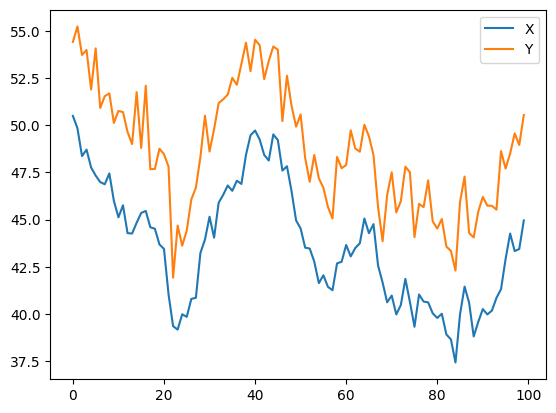

In [16]:
some_noise = np.random.normal(0, 1, 100)
Y = X + 5 + some_noise
Y.name = 'Y'
pd.concat([X, Y], axis = 1).plot();

# Def: Cointegration

"Cointegration is a statistical concept that refers to the phenomenon where nonstationary processes can have linear combinations that are stationary."

$$ y_{1t} = \gamma x_{t} + w_{1t} $$
$$ y_{2t} = x_{t} + w_{2t} $$

We have created an example of two cointegrated series. Cointegration is a distinct form of correlation, where a linear combination of two time series fluctuates around a mean. This combination is consistently linked to the same probability distribution over time.

https://www.sciencedirect.com/topics/social-sciences/cointegration#:~:text=Cointegration%20is%20a%20statistical%20concept,linear%20combinations%20that%20are%20stationary.

https://bookdown.org/palomar/portfoliooptimizationbook/15.2-cointegration-vs-correlation.html

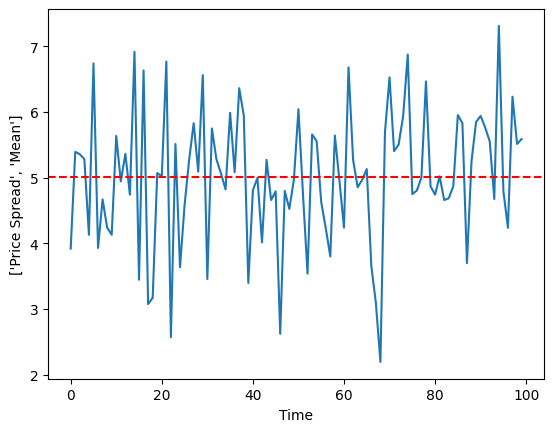

In [17]:
(Y - X).plot()
plt.axhline((Y - X).mean(), color = 'red', linestyle = '--')
plt.xlabel('Time')
plt.ylabel(['Price Spread', 'Mean']);

# Testing for Cointegration

There is a convenient test that lives in statsmodels.tsa.stattools. We should see a very low p-value, as we've artifically created two series that are as cointegrated as physically possible.

In [23]:
#Compute the p-value of the cointegration test; this will inform us whether the spread between the 2 time series is stationary around its mean.

score, pvalue, _ = coint(X, Y)

if pvalue < 0.05:
    print('Likely Cointegrated.')
else:
    print('Likely Not Cointegrated.')

print(f'p-value: {pvalue}')

Likely Cointegrated.
p-value: 2.0503418653415035e-16


# Def: Correlation

"Correlation is a basic concept in probability that refers to how “related” two random variables are. We can use this measure for stationary time series but definitely not with nonstationary time series. In fact, when we refer to correlation between two financial assets, we are actually employing this concept on the returns of the assets and not the price values."

$$\rho = \frac{E[(Δy_{1t}-\mu_{1})⋅(Δy_{2t}-\mu_{2})]}{\sqrt{Var(Δy_{1t})⋅Var(Δy_{2t})}}$$

https://bookdown.org/palomar/portfoliooptimizationbook/15.2-cointegration-vs-correlation.html

In [24]:
X.corr(Y)

0.9497090646385932

# Correlation vs. Cointegration

Cointegration describes the long-term relationship between asset prices, while correlation describes the short-term relationship between returns.

https://bookdown.org/palomar/portfoliooptimizationbook/15.2-cointegration-vs-correlation.html

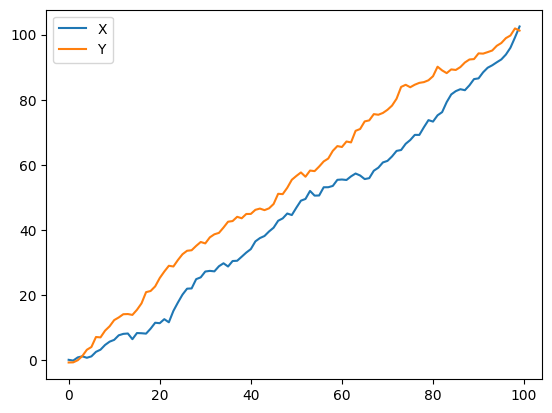

In [25]:
X_returns = np.random.normal(1, 1, 100)
Y_returns = np.random.normal(1, 1, 100)

X_diverging = pd.Series(np.cumsum(X_returns), name = 'X')
Y_diverging = pd.Series(np.cumsum(Y_returns), name = 'Y')

pd.concat([X_diverging, Y_diverging], axis = 1).plot();

In [26]:
print('Correlation: ' + str(X_diverging.corr(Y_diverging)))
score, pvalue, _ = coint(X_diverging, Y_diverging)
print('Cointegration Test p-value: ' + str(pvalue))

Correlation: 0.9883877288043449
Cointegration Test p-value: 0.9022713342921642
